In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

from datetime import datetime, timedelta

In [3]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
#plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13, family='Times New Roman')          # controls default text sizes
%config InlineBackend.figure_format = 'svg'

In [4]:
sheet_name = ['Inventory', 'Sales', 'Purchases']
inventory = pd.read_csv(f'https://docs.google.com/spreadsheets/d/1QMk68uSNOx-A_1MdJUYvBrUFyltVehSUJMVxeNsvj_c/gviz/tq?tqx=out:csv&sheet={sheet_name[0]}')
sales = pd.read_csv(f'https://docs.google.com/spreadsheets/d/1QMk68uSNOx-A_1MdJUYvBrUFyltVehSUJMVxeNsvj_c/gviz/tq?tqx=out:csv&sheet={sheet_name[1]}')
purchases = pd.read_csv(f'https://docs.google.com/spreadsheets/d/1QMk68uSNOx-A_1MdJUYvBrUFyltVehSUJMVxeNsvj_c/gviz/tq?tqx=out:csv&sheet={sheet_name[2]}')

inventory = inventory.iloc[:, :9]
sales = sales.iloc[:, :6]
purchases = purchases[purchases.Name.notna()]
inventory.columns = inventory.columns.str.lower()
sales.columns = sales.columns.str.lower()
purchases.columns = purchases.columns.str.lower()

sales.date = sales.date.apply(lambda date: datetime.strptime(date + "-2023", "%d-%b-%Y").strftime("%d/%m/%Y"))

In [5]:
def date_sort(date):
    return pd.to_datetime(date, format='%d/%m/%Y')

In [6]:
sales = sales[sales.quantity.notna()]

In [7]:
sales[(sales.discount_percent < -0.1) & ~(sales.name.isin(["Nicip Cold", 'Eno Orange Flavour', 'Early Morning Churna']))]

,date,name,price,quantity,discount,discount_percent
52,27/01/2023,L-Mycin 500,76.0,0.78,-11.333333,-0.15
123,01/02/2023,Racy-MR,10.0,0.13,-2.200000,-0.22
134,02/02/2023,Rebez DSR,40.0,0.23,-5.600000,-0.14
236,11/02/2023,Glycomet Gp 2,40.0,0.24,-6.000000,-0.15
294,17/02/2023,Sumoflam,30.0,0.16,-5.333333,-0.18
352,20/02/2023,Sumoflam,30.0,0.16,-5.333333,-0.18
527,06/03/2023,Racy-MR,10.0,0.13,-2.200000,-0.22
563,08/03/2023,Cheston Cold,11.0,0.24,-1.800000,-0.16
629,15/03/2023,L-Fix 200,20.0,0.13,-5.000000,-0.26
678,17/03/2023,Betnovate-C,60.0,1.00,-10.000000,-0.20


In [8]:
merged = pd.merge(sales, inventory, on='name', copy=True)
merged.drop(merged.iloc[:, 6:10], inplace=True, axis=1)
merged = merged.iloc[:, :-1]
merged = merged[(merged['discount_percent']<-0.1) & (merged['type']=='Tablet/Capsule')]
merged = merged.sort_values('date', key=date_sort)
merged = merged[(merged.name!='Racy-P Tab') & (merged.price!=20)]
merged

,date,name,price,quantity_x,discount,discount_percent,type,updated_on,used_for
346,27/01/2023,L-Mycin 500,76.0,0.78,-11.333333,-0.15,Tablet/Capsule,21-Jan,Antibiotic
99,01/02/2023,Racy-MR,10.0,0.13,-2.200000,-0.22,Tablet/Capsule,21-Jan,Pain Reliever
138,02/02/2023,Rebez DSR,40.0,0.23,-5.600000,-0.14,Tablet/Capsule,10-Mar,Gastric
557,11/02/2023,Glycomet Gp 2,40.0,0.24,-6.000000,-0.15,Tablet/Capsule,21-Jan,Diabetes
742,17/02/2023,Sumoflam,30.0,0.16,-5.333333,-0.18,Tablet/Capsule,10-Mar,Pain and Swelling
743,20/02/2023,Sumoflam,30.0,0.16,-5.333333,-0.18,Tablet/Capsule,10-Mar,Pain and Swelling
108,06/03/2023,Racy-MR,10.0,0.13,-2.200000,-0.22,Tablet/Capsule,21-Jan,Pain Reliever
1092,08/03/2023,Cheston Cold,11.0,0.24,-1.800000,-0.16,Tablet/Capsule,8-Apr,Cold and Flu
1169,26/03/2023,Painlock,10.0,0.22,-1.100000,-0.11,Tablet/Capsule,8-Apr,Pain Reliever


### Products that have expired

In [9]:
expiry_check = inventory[inventory.expiry.notna()].copy()
expiry_check[expiry_check.apply(lambda x: datetime.strptime(x['expiry'], '%m-%d-%Y') < datetime.now(), axis=1)]

,name,amount,mrp,expiry,quantity,type,updated_on,used_for,unnamed: 8
6,Acne Star,75 g,75.0,06-01-2023,3.0,Soap,21-Jan,Pimples and acne,NaN
10,Aldegesic-SP,10 tabs,115.0,05-01-2023,4.0,Tablet/Capsule,16-Apr,Pain and Swelling,NaN
18,Alostar T4,10 tabs,200.0,06-01-2023,60.0,Tablet/Capsule,21-Jan,Pain Reliever,NaN
25,Amstar-Clav Forte,30 ml,150.0,04-01-2023,10.0,Syrup,21-Jan,Antibiotic,NaN
26,ANDY sliv,200 ml,150.0,06-01-2023,7.0,Syrup,21-Jan,Liver,NaN
...,...,...,...,...,...,...,...,...,...
441,Well Shilajit OJAS,30 tabs,599.0,07-01-2023,1.0,Tablet/Capsule,21-Jan,None,NaN
445,Xlipod-CV,30 ml,150.0,06-01-2023,9.0,Syrup,21-Jan,Antibiotic,NaN
453,Zota's Surface Disinfectant Spray,75 ml,180.0,05-01-2022,2.0,Spray,21-Jan,None,NaN
455,Zyri,200 ml,109.0,03-01-2023,28.0,Syrup,21-Jan,Enzyme,NaN


### Products that will soon expire

In [10]:
expiry_check[expiry_check.apply(lambda x: datetime.now() < datetime.strptime(x['expiry'], '%m-%d-%Y') < datetime.now() + timedelta(days=30*3), axis=1)]

,name,amount,mrp,expiry,quantity,type,updated_on,used_for,unnamed: 8
2,A-Kare,4 tabs,415.0,10-01-2023,1.0,Tablet/Capsule,21-Jan,Regularization of Mensuration,NaN
7,Albecef-AZ 250 LB,10 tabs,375.0,08-01-2023,10.0,Tablet/Capsule,21-Jan,Antibiotic,NaN
8,Alberzen,10 tabs,18.0,08-01-2023,1.0,Tablet/Capsule,30-Jan,Allergy,NaN
12,Alizin-M,60 ml,74.0,08-01-2023,6.0,Syrup,21-Jan,Cold and Flu,NaN
13,Alkem Cold,60 ml,53.0,08-01-2023,1.0,Syrup,21-Jan,Cold and Flu,NaN
15,All-star P syp,60ml,63.0,09-01-2023,10.0,Syrup,21-Jan,Pain and Fever,NaN
17,Alostar P,10 tabs,59.0,09-01-2023,40.0,Tablet/Capsule,21-Jan,Pain and Fever,NaN
48,Becosule,20 tabs,50.0,10-01-2023,7.0,Tablet/Capsule,10-Mar,Vitamin,NaN
54,Betnovate-N,25 g,50.0,08-01-2023,8.0,Ointment,21-Jan,None,NaN
69,CBCL Ear Drops 15ml,15ml,65.0,09-01-2023,75.0,Drops,21-Jan,Ear Drop,NaN


### To check change in price

In [11]:
def price(med):
    new = purchases[purchases.name==med['name']].mrp
    if new.empty:
        return 'Not Change'
    
    if len(new) > 1 and new.std() != 0:             # To check if all the values are same or not
        print(new)
    
    if new.iloc[-1] != med['mrp']:
        return f'{new.iloc[0]}'
    else:
        return 'Not Change'
    
change = inventory.loc[:, ['name', 'mrp']].copy()
change['status'] = inventory.apply(price, axis=1)
change[~(change.status == 'Not Change')]

8      4.0
175    9.0
Name: mrp, dtype: float64
16     118.0
110    118.0
178    119.0
Name: mrp, dtype: float64


,name,mrp,status
106,Dispovan 2ml,4.0,4.0
224,Lupicof-DX,118.0,118.0


### Find out average sales per day

In [12]:
day_sales = sales.groupby('date', as_index=False).agg({'price': 'sum'})
day_sales['day'] = day_sales.apply(lambda x: datetime.strptime(x['date'], '%d/%m/%Y').strftime('%A'), axis = 1)
day_sales = day_sales.sort_values('date', key=date_sort)

count_days = day_sales.day.value_counts()
count_days = count_days.reset_index()
count_days = count_days.rename(columns={'index': 'day', 'day':'count'})

grouped_day = day_sales.groupby('day', as_index=False).agg({'price': 'sum'})
grouped_day = pd.merge(grouped_day, count_days, on='day')
grouped_day['average'] = grouped_day.apply(lambda x: x['price']/x['count'], axis=1)

custom_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
custom_order.reverse()
grouped_day['day'] = pd.Categorical(grouped_day.day, categories=custom_order, ordered=True)
grouped_day = grouped_day.sort_values('day')
grouped_day

,day,price,count,average
2,Saturday,10757.00,10,1075.700000
0,Friday,13399.00,13,1030.692308
4,Thursday,11979.00,12,998.250000
6,Wednesday,10073.00,13,774.846154
5,Tuesday,12654.16,13,973.396923
1,Monday,9209.00,10,920.900000
3,Sunday,10592.00,12,882.666667


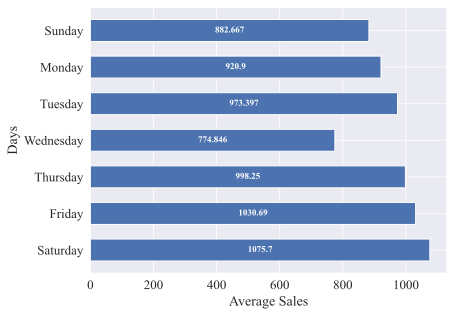

In [13]:
bars = plt.barh(grouped_day.day, grouped_day.average, height = 0.6, color=sns.color_palette('deep')[0])
plt.ylabel('Days')
plt.xlabel('Average Sales')
plt.bar_label(bars, fontsize=9, label_type='center', fontweight='bold', color='white')
plt.savefig('../Photos/7', bbox_inches='tight')
plt.show()

In [14]:
grouped_day.average.describe()

count       7.000000
mean      950.921722
std       101.028649
min       774.846154
25%       901.783333
50%       973.396923
75%      1014.471154
max      1075.700000
Name: average, dtype: float64

### Coefficient of Variation

In [15]:
grouped_day.average.describe()['std']/grouped_day.average.describe()['mean']

0.10624286605842827

### Inventory Analysis

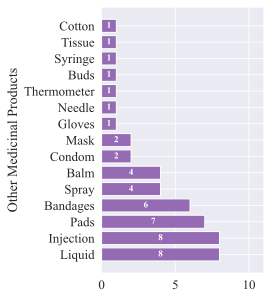

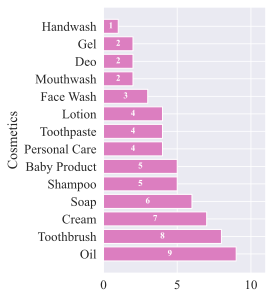

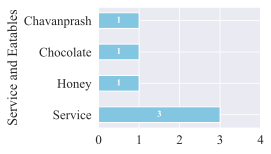

In [16]:
type_count = inventory.type.value_counts().reset_index()
type_count = type_count.rename(columns={'index': 'type', 'type':'number'})
group_product = pd.read_excel('test.xlsx')

plt.subplot(1, 2, 1)
bars = plt.barh(group_product.Other_Medicinal_Products.to_list(), type_count[type_count.type.isin(group_product.Other_Medicinal_Products.to_list())].number, color=sns.color_palette('muted')[4])
plt.bar_label(bars, fontsize=9, label_type='center', fontweight='bold', color='white')
plt.ylabel('Other Medicinal Products')
plt.xlim(0, 11)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
plt.savefig('../Photos/2', bbox_inches='tight')
plt.show()

plt.subplot(1, 2, 2)
bars = plt.barh(group_product[group_product.Cosmetics.notna()].Cosmetics.to_list(), type_count[type_count.type.isin(group_product.Cosmetics.to_list())].number, color=sns.color_palette('muted')[6])
plt.bar_label(bars, fontsize=9, label_type='center', fontweight='bold', color='white')
plt.ylabel('Cosmetics')
plt.xlim(0, 11)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
plt.savefig('../Photos/3', bbox_inches='tight')
plt.show()

plt.subplot(2, 2, 1)
bars = plt.barh(group_product[group_product.Service_and_Eatables.notna()].Service_and_Eatables.to_list(), type_count[type_count.type.isin(group_product.Service_and_Eatables.to_list())].number, color=sns.color_palette('muted')[9], height=0.5)
plt.bar_label(bars, fontsize=9, label_type='center', fontweight='bold', color='white')
plt.ylabel('Service and Eatables')
plt.xlim(0, 4)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
plt.savefig('../Photos/4', bbox_inches='tight')
plt.show()

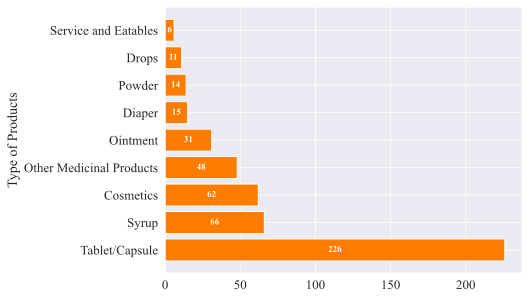

In [17]:
type_count = type_count.replace(to_replace=group_product.Other_Medicinal_Products.to_list(), value='Other Medicinal Products')
type_count = type_count.replace(to_replace=group_product.Cosmetics.to_list(), value='Cosmetics')
type_count = type_count.replace(to_replace=group_product.Service_and_Eatables.to_list(), value='Service and Eatables')
type_count = type_count.groupby('type').agg({'number': 'sum'}).reset_index()
type_count = type_count.sort_values('number', ascending=False)
bars = plt.barh(type_count.type.to_list(), type_count.number.to_list(), color=sns.color_palette('bright')[1])
plt.bar_label(bars, fontsize=9, label_type='center', fontweight='bold', color='white')
plt.ylabel('Type of Products')
plt.savefig('../Photos/1', bbox_inches='tight')
plt.show()

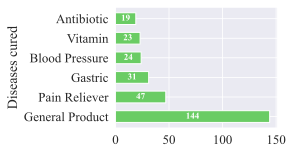

In [18]:
disease = inventory.used_for.value_counts().reset_index()
disease = disease.rename(columns={'index': 'disease', 'used_for':'number'})
disease = disease.replace(to_replace='None', value='General Product')

plt.subplot(2, 2, 1)
bars = plt.barh(disease.disease.loc[:5], disease.number.loc[:5], color=sns.color_palette('muted')[2], height=0.6)
plt.bar_label(bars, fontsize=9, label_type='center', fontweight='bold', color='white')
plt.savefig('../Photos/5', bbox_inches='tight')
plt.ylabel('Diseases cured')
plt.show()

### Purchase Analysis

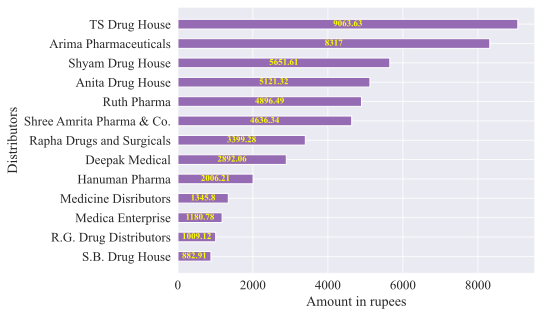

In [19]:
distributors = purchases.groupby('distributor').agg({'total': 'sum', 'discount': 'sum'}).reset_index()
distributors = distributors.sort_values('total')
bars = plt.barh(distributors.distributor, distributors.total, color=sns.color_palette('muted')[4], height=0.5)
plt.bar_label(bars, fontsize=9, label_type='center', fontweight='bold', color='yellow')
plt.ylabel('Distributors')
plt.xlabel('Amount in rupees')
plt.savefig('../Photos/6', bbox_inches='tight')
plt.show()

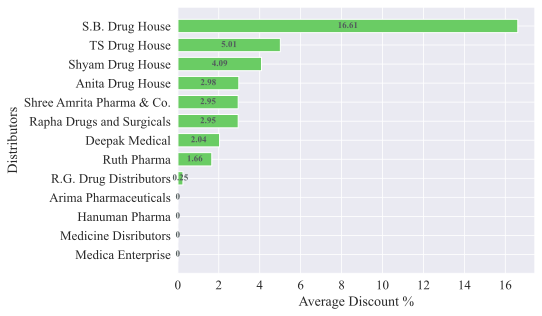

In [20]:
distributors['dis_percent'] = round(distributors.discount * 100 / distributors.total, 2)
distributors = distributors.sort_values('dis_percent')
bars = plt.barh(distributors.distributor, distributors.dis_percent, color=sns.color_palette('muted')[2], height=0.7)
plt.bar_label(bars, fontsize=9, label_type='center', fontweight='bold', color='#515B5B')
plt.xlabel('Average Discount %')
plt.ylabel('Distributors')
plt.savefig('../Photos/8', bbox_inches='tight')
plt.show()

### Sale Analysis

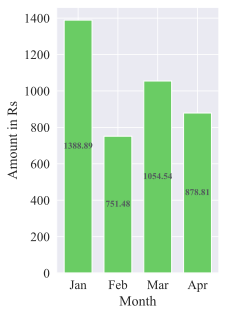

In [21]:
trade = sales.copy()
trade.date = date_sort(trade.date)
result = trade.groupby(trade.date).agg({'price': 'sum'}).reset_index()
result = result.groupby(result.date.dt.month).agg({'price': 'sum', 'date': 'count'})
result = result.rename(columns={'date': 'days'}).reset_index()
result['average'] = round(result.price / result.days, 2)

plt.subplot(1, 2, 2)
bars = plt.bar(['Jan', 'Feb', 'Mar', 'Apr'], result.average, color=sns.color_palette('muted')[2], width=0.7)
plt.bar_label(bars, fontsize=9, label_type='center', fontweight='bold', color='#515B5B')
plt.xlabel('Month')
plt.ylabel('Amount in Rs')
plt.savefig('../Photos/9', bbox_inches='tight')
plt.show()

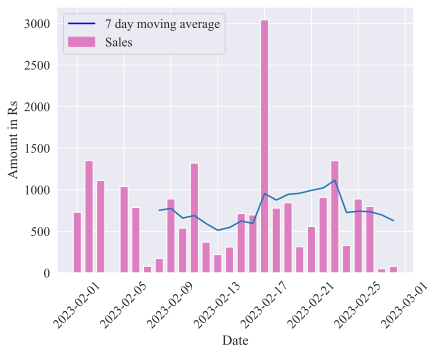

In [22]:
feb = trade.groupby(trade.date).agg({'price': 'sum'}).reset_index()
feb = feb[(feb.date>pd.to_datetime('2023-01-31')) & (feb.date<pd.to_datetime('2023-03-01'))]
feb['average'] = feb.price.rolling(window=7).mean()

plt.plot(feb.date.loc[15:], feb[feb.average.notna()].average)
line = mlines.Line2D([], [],color='blue', label='7 day moving average')
plt.bar(feb.date, feb.price, color=sns.color_palette('muted')[6], width=0.7)
bars = mpatches.Patch(color=sns.color_palette('muted')[6], label='Sales')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Amount in Rs')
plt.legend(handles = [line, bars])
plt.savefig('../Photos/10', bbox_inches='tight')
plt.show()

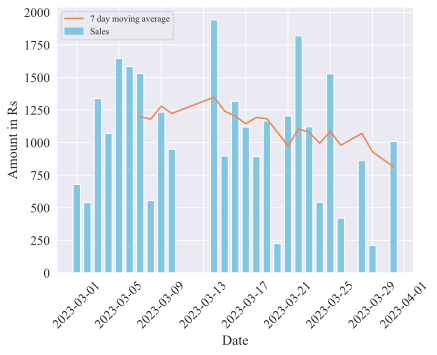

In [23]:
mar = trade.groupby(trade.date).agg({'price': 'sum'}).reset_index()
mar = mar[(mar.date>pd.to_datetime('2023-02-28')) & (mar.date<pd.to_datetime('2023-04-01'))]
mar['average'] = mar.price.rolling(window=7).mean()
plt.bar(mar.date, mar.price, color=sns.color_palette('muted')[9], width=0.7)
plt.xlabel('Date')
plt.ylabel('Amount in Rs')
plt.xticks(rotation=45)
plt.plot(mar.date.loc[42:], mar[mar.average.notna()].average, color=sns.color_palette('muted')[1])
line = mlines.Line2D([], [],color=sns.color_palette('muted')[1], label='7 day moving average')
bars = mpatches.Patch(color=sns.color_palette('muted')[9], label='Sales')
plt.legend(handles = [line, bars], fontsize=9)
plt.savefig('../Photos/11', bbox_inches='tight')
plt.show()

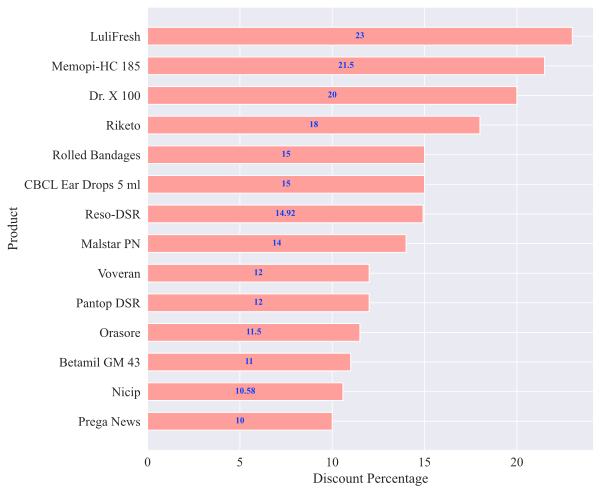

In [24]:
discount = sales.copy()
discount = discount.groupby('name').agg({'discount_percent': 'mean'}).reset_index()
discount = discount[discount.discount_percent > 0.1].reset_index()
discount.discount_percent = round(discount.discount_percent, 4) * 100
discount = discount.sort_values('discount_percent').reset_index()

fig = plt.figure(figsize=(8,8))
bars = plt.barh(discount.name, discount.discount_percent, color=sns.color_palette('pastel')[3], height=0.6)
plt.bar_label(bars, fontsize=9, label_type='center', fontweight='bold', color=sns.color_palette('bright')[0])
plt.ylabel('Product')
plt.xlabel('Discount Percentage')
plt.savefig('../Photos/12', bbox_inches='tight')
plt.show()